<a href="https://colab.research.google.com/github/jaquelinedahora/Flowgorithm/blob/main/estudo_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub

Exibe informações sobre os tipos de dados e valores não nulos

In [33]:
df=pd.read_csv('telco.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Exibe estatísticas descritivas das variáveis numéricas

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


verificar se há valores ausentes em cada coluna

In [35]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Converter valores de string em numeros

In [36]:
# prompt: converter os dados da coluna TotalCharges em numeros

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


Verifica se ainda há valores ausentes

In [37]:
median_total_charges = df['TotalCharges'].median()

In [38]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Histograma para 'Tenure'

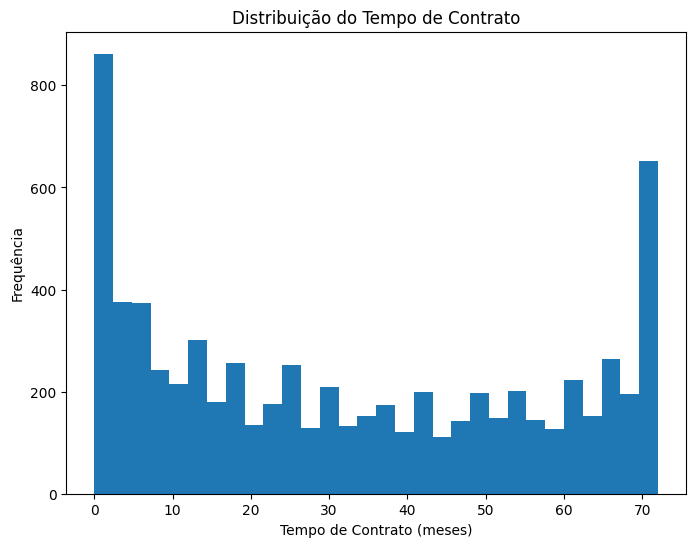

In [39]:
plt.figure(figsize=(8, 6))
plt.hist(df['tenure'], bins=30)
plt.title('Distribuição do Tempo de Contrato')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Frequência')
plt.show()


Gráfico de barras para 'Contract'

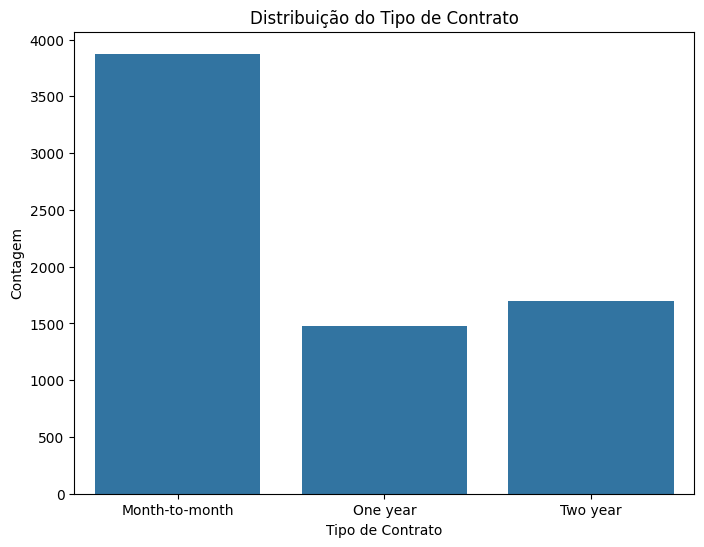

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=df)
plt.title('Distribuição do Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.show()

Boxplot de 'MonthlyCharges' por 'Churn'

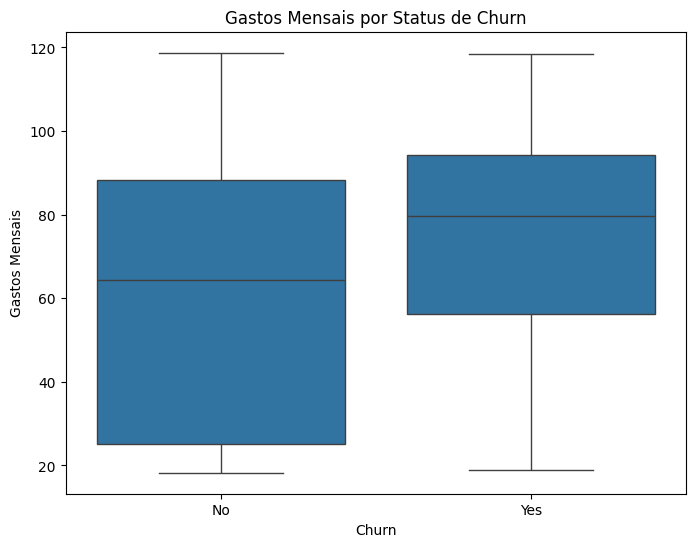

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Gastos Mensais por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Gastos Mensais')
plt.show()

Gráfico de barras empilhadas para 'Churn' por 'Contract'

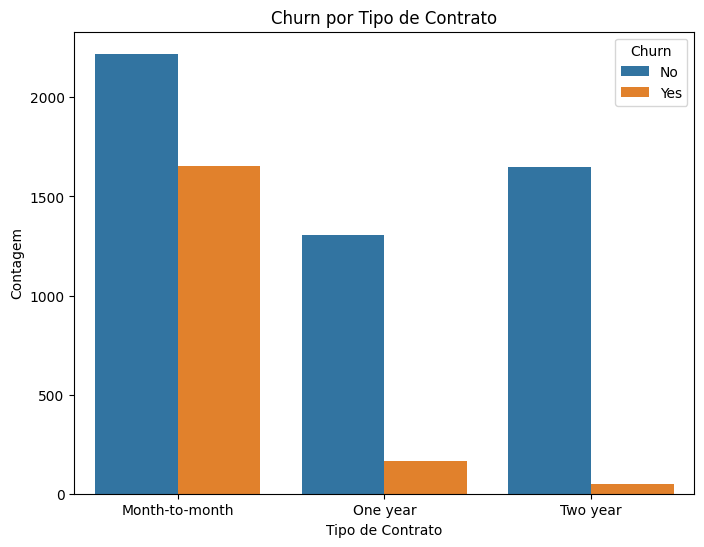

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.show()

Boxplot de 'Tenure' por 'Churn'

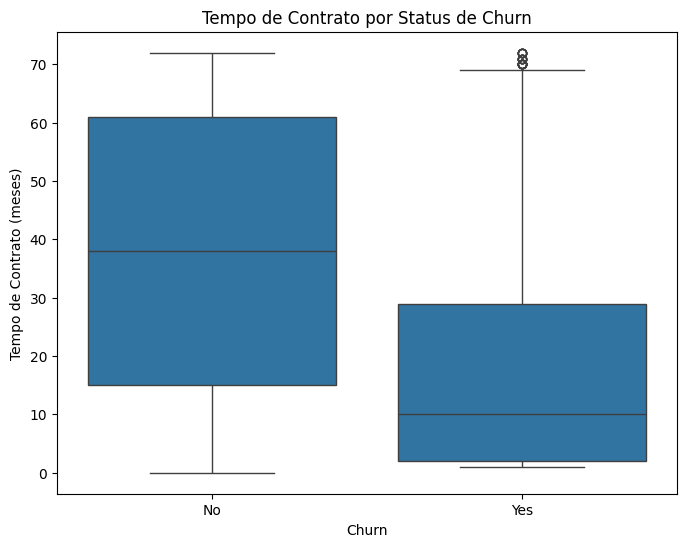

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)  # Changed 'Tenure' to 'tenure'
plt.title('Tempo de Contrato por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

Matriz de correlação

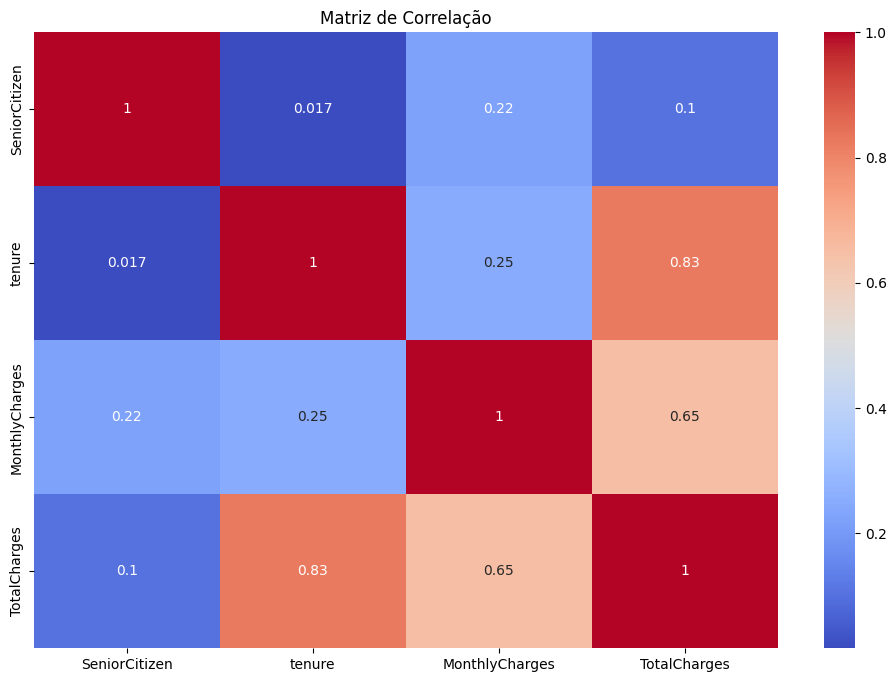

In [44]:
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Calcula a taxa de churn

In [45]:
churn_rate = df['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f'Taxa de Churn: {churn_rate:.2f}%')

Taxa de Churn: 26.54%


Identifica as variáveis mais correlacionadas com 'Churn'

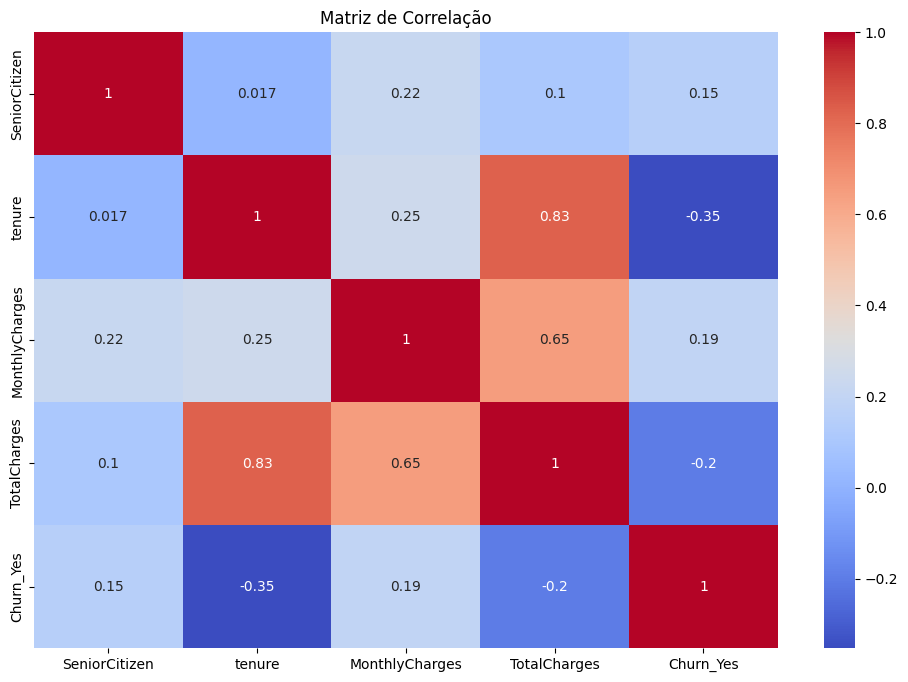

In [46]:
plt.figure(figsize=(12, 8))
# Include 'Churn' column in the correlation matrix
numerical_df = df[['Churn'] + [col for col in df.select_dtypes(include=np.number) if col != 'customerID']]  # Include 'Churn' and numerical features
# Convert 'Churn' to numerical using pd.get_dummies or similar methods
numerical_df = pd.get_dummies(numerical_df, columns=['Churn'], drop_first=True)  # Convert 'Churn' to numerical
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [47]:
monthly_churn_rate = df[df['Contract'] == 'Month-to-month']['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f'Taxa de Churn para Contrato Mensal: {monthly_churn_rate}')

Taxa de Churn para Contrato Mensal: 42.70967741935484


ecursos para modelagem

In [48]:
features = ['tenure', 'MonthlyCharges', 'Contract', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']
target = 'Churn'

df = df[features + [target]]

Codifica variáveis categóricas usando one-hot encoding

In [49]:
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                 'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first=True)


Dividir os dados

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your data is in 'telco.csv'
df = pd.read_csv('telco.csv')

# ... (Your previous code to preprocess the data, like get_dummies) ...


# Divide os dados em conjuntos de treinamento e teste
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Converte 'Churn' para 0 e 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelagem

In [51]:
# Usaremos Regressão Logística como exemplo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)


Treinar o modelo

In [55]:
# ipython-input-50-8c63b3b7f6af
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your data is in 'telco.csv'
df = pd.read_csv('telco.csv')

# ... (Your previous code to preprocess the data, like get_dummies) ...

# Drop the 'customerID' column as it's not relevant for prediction
df = df.drop('customerID', axis=1)

# Divide os dados em conjuntos de treinamento e teste
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Converte 'Churn' para 0 e 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Avaliar o modelo